# Labrapport som Jupyter Notebook på fysikklab våren 2023
Synnøve Arnesen, Dina-Madelen Sandlie Hegna, Andreas Teodor Nysæter, Simen Kristoffer Bedringås, David Persson<br>
Institutt for Teknisk kybernetikk, NTNU
Institutt for Elektroniske systemer, NTNU

## Sammendrag

Det har blitt gjort et forsøk med en kule som ruller ned en berg-og-dalbane med baneform $y(x)$. Forsøket ble gjennomført både numerisk, ved bruk av python, og eksperimentelt. Ved bruk av programmet “Tracker” har blant annet kulens fart, rulletid og posisjon blitt målt. Rulletiden til kulen var $1.31 \, \textrm{s}$ med $SE = 0.01 \, \textrm{s}$. Kulens rulletid i simuleringen var $1.53 \, \textrm{s}$. Kulen hadde en sluttfart på $1.71 \, \textrm{m/s} med $SE = 0.0166 \, \textrm{m/s}$. Kulens sluttfart i simuleringen var på $1.67 \, \textrm{m/s}$.


## Introduksjon

Dette labforsøket går ut på å studere en kule som ruller (uten å gli) på en berg-og-dal-bane. Forsøket har blitt simulert numerisk i python hvor programmet har regnet ut og plottet relevante størrelser som blant annet baneform, farten til kulen $v(x)$ og kulens kinetiske energi $K$. Forsøket har også blitt gjennomført fysisk. Her har rulleforsøkene blitt filmet og kulens bevegelse er blitt analysert i sporingsprogrammet “Tracker” [1]. Ved hjelp av grunnleggende mekanikk og loven om energibevaring har det vært mulig å beregne blant annet kulens totale kinetiske energi K. Den grunnleggende mekanikken som er benyttet i dette forsøket er basert på Newtons tre lover som ble presentert i 1686 i “Principia Mathematica Philosophiae Naturalis.” [2].
Til slutt har resultatene fra simuleringen og det fysiske forsøket blitt sammenlignet og diskutert.



## Teori
Denne teoridelen er i stor grad basert på informasjon fra labligningene [3]

Når en kule ruller ned en bane med kjent form gitt av $y(x)$ og det antas at mekanisk energi er bevart, vil det være mulig å regne ut størrelser som hastighet, friksjonskraft mellom kula og overflaten, og rulletiden (med hjelp av numerikk). For å regne ut disse størrelsene må det også antas at den første- og andrederiverte av $y$, altså $y’$ og $y’’$ er kjent.


Kulas treghetsmoment mhp. rotasjonsaksen(som går gjennom massesenteret CM) er gitt ved $$I_0 = cmr^2.$$
Her er $m$ kulas masse, $r$ kulas radius og $c$ en konstant som kan settes til $\frac{2}{5}$ under antagelsen at kula er ei kompakt kule med uniform massefordeling. Videre er det nyttig å anta at banens krumningsradius er mye større enn kulas radius, siden dette medfører at kulas massesenter følger samme form som banen, bare forskjøvet i y-retning.


I kulas startpunkt $x = 0$ er høyden $y(0) = y_0$. Det kan antas at kula starter i ro, og dermed blir den mekaniske energien
$$E = U_0 = mgy_0.$$
Her er nullpunktet for $U$ definert som $y = 0$. Kulas rotasjonsenergi er gitt ved $E_{rot}=\frac{1}{2}I\omega^2$, og ved å sette inn $I = cmr^2$ og $\omega = \frac{v}{r}$ blir den totale kinetiske energien $K$ gitt ved

$$K = \frac{1 + c}{2}mv^2,$$ 

der $v$ er hastigheten. Bevaring av energi gir

$$U_0 = K + mgy$$
$$\iff v = \sqrt{\frac{2g (y_0 - y)}{1 + c}}$$

i et punkt på banen der høyden er $y$ og hastigheten er $v$. Siden $y$ er en funksjon av posisjonen $x$, kan også farten betraktes som en funksjon $v(x)$.

Krumningen (med fortegn), som også er den inverse av krumningsradiusen til grafen $y(x)$ er gitt ved

$$\kappa = \frac{y’’}{(1 + (y’)^2)^{\frac{3}{2}}},$$

som umiddelbart gir sentripetalakselerasjonen

$$a_\perp= \frac{v^2}{R} =  v^2\kappa = \frac{2g (y_0 - y)}{1 + c} \frac{y’’}{(1 + (y’)^2)^{\frac{3}{2}}}$$

Fortegnet til $\kappa$ avhenger av banens krumning slik at $\kappa$ er positiv når banen krummer oppover, og negativ når banen krummer nedover ($\kappa$ har samme fortegn som $y’’$). Dette vil også bli fortegnet til $a_\perp$, som er konsistent med å ha positiv retning oppover.

med innsatt $c=\frac{2}{5}$ blir hastigheten

$$\sqrt{\frac{10g(y_0-y)}{7}}.$$

Newtons lov, sett fra et koordinatsystem som står normalt på banen og med normalkraften som positiv retning i y-aksen gir oss

$$N - mg \cos{\beta} = ma_{\perp}.$$

Her er $\beta$ banens helningsvinkel. Dette kan omformes til

$$N = m(g\cos{\beta} + a_{\perp}).$$

Dette viser at når banen peker oppover, er $a_{\perp} > 0$, altså peker $a_{\perp}$ i samme retning som $N$, som gjør at $N$ blir større enn $mg\cos{\beta}$. Når banen peker nedover, skjer det motsatte, altså er $a_{\perp} < 0$ og peker i motsatt retning av $N$, og $N$ blir mindre enn $mg\cos{\beta}$.

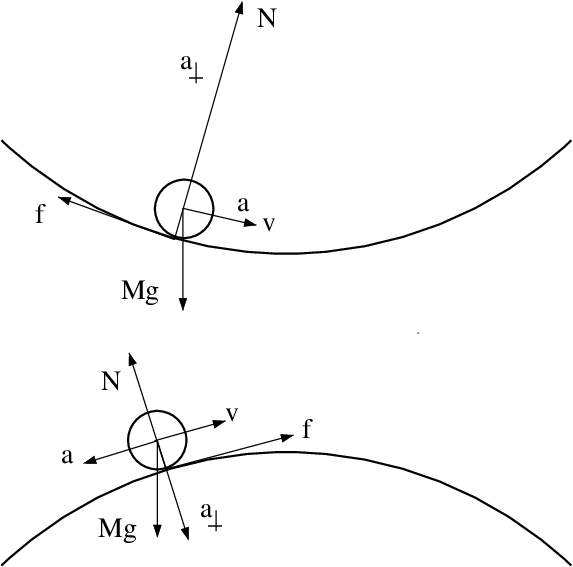

In [6]:
from IPython import display
display.Image("./images/krefter.png", width=300)

<b>Figur 1.</b> Kule som ruller på et krumt underlag. Her er $v$ kulas fart,
$a$ er baneakselerasjon, $a_\perp$ er sentripetalakselerasjon, $Mg$ er tyngdekraft,
$f$ er friksjonskraft og $N$ er normalkraft. <br><br>


Den siste størrelsen som kan være nyttig å utlede nå er den statiske friksjonskraften fra banen på kula. Ved valg av helningsvinkelen $\beta$ slik at $\beta < 0$ når banen heller nedover, og $\beta > 0$ når banen heller oppover får stigningstallet 

$$ y' = \frac{dy}{dx} = \tan{\beta} $$

riktig fortegn. De tangentielle kreftene er friksjonskraften $F$ og tyngdekraftens horisontale komponent $-mg\sin{\beta}$. Hvis banen heller nedover blir $\beta < 0$, $F < 0$ og $a = \frac{dv}{dt} > 0$. N2 gir da 

$$ -mg\sin{\beta} + F = ma. $$

Hvis banen derimot heller oppover blir $\beta > 0$, $F > 0$, og $a = \frac{dv}{dt} < 0$. N2 gir da

$$ mg\sin{\beta} - F = -ma, $$

altså er ligningen lik uavhengig av helningen til banen. Baneakselerasjonen kan regnes ut som den deriverte av banefarten $v(y) = \sqrt{\frac{2g (y_0 - y)}{1 + c}}$, altså

$$ a = -\frac{g \sin{\beta}}{1 + c}. $$

Her brukes $\frac{dy}{dt} = v_y = -v\sin{\beta}$. Med $c = \frac{2}{5}$ blir $a=-\frac{5g\sin{\beta}}{7}$. Innsetting gir 

$$F = ma + mg\sin{\beta} = \frac{c}{1 + c}mg\sin{\beta}, $$

eller $F = \frac{2mg\sin{\beta}}{7}$ for kulen. En forutsetning som har blitt tatt er at kula ruller rent og ikke slurer på underlaget. Det betyr at den statiske friksjonskraften $F$ ikke kan overstige den maksimale verdien $|F|=\mu_s|N|$.

#### Tidsutvikling

Ingen av ligningene hittils har inneholdt tiden på noe vis, som følger av at utgangspunktet har vært bevaring av mekanisk energi. For å finne kulas tidsutvikling er det ofte nødvendig å gå helt tilbake til Newtons andre lov og bruke numerikk, men i tilfellet hvor kula ruller på an bane med bestemt form $y(x)$ kan det gjøres enklere ved å bruke at hastigheten $v$ i hvert punkt $y$ ver gitt ved $v = \sqrt{\frac{10g(y_0-y)}{7}}$. Tiden $dt$ som brukes på en forflytning $dx$ er da gitt direkte ved $dt = \frac{dx}{v_x}$

Med $k + 1$ jevnt fordelte punkter $\{x_0, x_1, ... x_{k - 1}, x_k\}$, og tilsvarende banehøyder definert er hastigheten $v_n$ og helningsvinkelen $\beta_n$ i posisjonen $(x_n, y_n)$ kjent. Det er da mulig å regne ut tidssteget $\Delta t_n$ mellom $x_{n-1}$ og $x_n (n=1,2,...k).$ Horisontalkomponenten til hastigheten i posisjon $x_n$ er gitt ved $v_{x,n} = v_n\cos{\beta}$. Den gjennomsnittle horisontalkomponenten til hastigheten på intervall nr. $n$ er gitt ved

$$ \langle v_x\rangle _n = \frac{1}{2}(v_{x,n - 1} + v_{x,n}) .$$

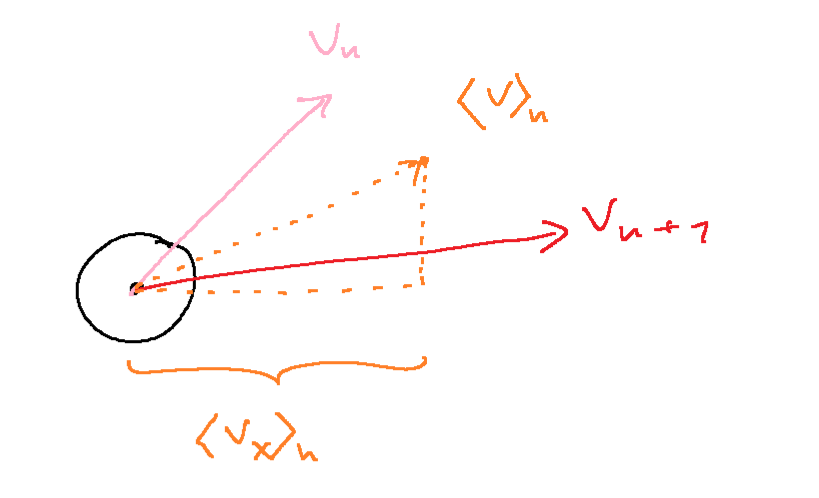

In [9]:
display.Image("./images/ballhastighet.png", width=500)

<b>Figur 2.</b>  Ballens gjennomsnittshastighet på intervall $n$. Her er $v_n$ den nåværende farten, v_{n+1} farten i neste tidssteg, $\langle v \rangle _n$ gjennomsnittsfarten i intervallet n, og $\langle v_x \rangle _n$ gjennomsnittsfarten i x-retning i intervallet n.


Innsettting i definisjonen for $\Delta t_n$ fra tidligere gir da 

$$ \Delta t_n = \frac{\Delta x_n}{\langle v_x\rangle _n} = \frac{2 \Delta x_n}{v_{x,n - 1} + v_{x,n}}. $$

Det horisontale steget $\Delta x_n$ vil alltid bare være $x_n - x_{n - 1}$. Dette gir til slutt at kula starter i posisjonen $(x_0, y_0)$ med starthastighet $v_0 = 0$ ved tidspunkt $t_0 = 0$ og passerer posisjonene $(x_n, y_n)$ med hastighet $v_n$ og ved tidspunkt

$$ t_n = \sum_{j = 1}^{n} \Delta t_j, \qquad  n = 1, ... ,k. $$

For å finne total rulletid lar vi n = k.






<!-- -----------------------------------------------------------------




Her presenteres relevant teori nødvendig for å lese resten av rapporten. Jupyter notebook støtter LaTeX-kode, så dere kan inkludere fint formaterte ligninger her. For eksempel har vi sett at baneakselerasjonen til ei kompakt kule som ruller på et krumt underlag uten å slure (gli) er gitt ved
$$a = -\frac{5g\sin{\beta}}{7},\label{eq1}\tag{1}$$
der $g$ er tyngdens akselerasjon og $\beta$ er banens helningsvinkel. Her forklarer vi alle nye størrelser som blir innført med ord. <br>
For at dette skal ha god flyt, skal ligningene kunne leses som en naturlig del av setningen, slik som ovenfor. 

Teoridelen inneholder ikke referanser til selve forsøket. Den er generell og kan leses isolert fra resten av rapporten.

Her vil det ofte være naturlig å inkludere en eller flere forklarende figurer. Disse skal dere lage selv, for eksempel ved hjelp av [Inkscape](https://inkscape.org/) som er et nokså brukervennlig program for å lage vektorgrafikk. Her er et eksempel på en slik figur: -->


## Metode

Nødvendig utstyr for eksperiment:
- Vater
- Kule
- Berg-og-dal-bane
- Merkepenner
- Kamerastativ

Eksperimentet går ut på at en kule skal rulle ned en kjent bane med åtte skruehøyder. Skruehøydene i dette prosjektet kan man finne i figur 3. Banen er tildelt av NTNU og skruehøydene er randomisert for hver gruppe. Forsøket skal filmes med et telefonkamera som er montert i et stativ med en standard filmkvalitet på 1080p og en bildefrekvens på 30. Det er viktig at både banen og kameraet er i vater. Kulens initielle fart er $0 \, \textrm{m/s}$ og startpunktet er toppunktet på banen. Hvert av forsøkene er en videosnutt av kulen som ruller ned banen, hvor hver videosnutt starter i det kulen blir sluppet, og slutter når kulen er på sluttpunktet i banen.

Prosjektet er gjort over fire økter hvor hver økt fokuserer på en hoveddel av oppgaven. Den første økten brukes for å organisere gruppen og finne en samarbeidsplattform. I dette prosjektet er det brukt Git. Økt 2 er for numerikk og beregninger av verdier som skal sammenlignes med resultater fra økt 3. I økt 3 gjennomføres eksperimentet. Eksperimentet blir filmet og kjørt gjennom analyseverktøyet Tracker [1] for å hente ut resultater. I økt 4 skal resultater fra økt 2 og 3 analyseres. 

Første økt ble brukt til å sette opp en samarbeidsplattform for gruppen, og sørge for at all nødvendig programvare for resten av prosjektet er lastet ned. Alle deltakerne skal sette opp en Github profil, en av deltakerne lager et prosjekt som deles med resten av gruppen. Git-programvaren lastes ned til prosjektdeltakernes datamaskiner. Dette er brukt i samsvar med Visual Studio Code. Visual Studio Code er et koderedigeringsprogram som lar prosjektdeltakerne skrive og kjøre kode i Python og Jupyter Lab. Deretter er det brukt Git-terminalkode som “git push”, “git init”, “git add” og “git pull” for å distribuere kode og verdier. Verktøyene brukt for koderedigering, distribusjon og utregninger i prosjektet er GitHub, Visual Studio Code og Tracker.

Økt 2 er for å regne ut nødvendige teoretiske verdier. For at prosjektet skal være individuelt er baneformen randomisert for hver gruppe. For å finne baneformen legges randomiserte verdier for skruehøydene inn i funksjonen CubicSpline, dette er en funksjon som ligger i interpolate-biblioteket i SciPy. Etter baneformen er satt regnes de teoretiske verdiene til fart $v(x)$, sluttfart, helningsvinkel, normalkraft og friksjonskraft. Verdiene ble regnet ut etter instruksjoner beskrevet i teoridelen. De teoretiske verdiene ble regnet ut med bruk av mattebiblioteket Numpy og grafer plottes ved hjelp av graf- og mattebiblioteket Matplotlib. En numerisk metode beskrevet i teoridelen ble brukt for å finne den totale rulletiden til ballen. I Python ble denne metoden implementert ved bruk av en for-løkke som summerte opp de små tidsstegene $\Delta t_n$. Eventuelle tidsutviklinger, verdier og grafer noteres ned for å senere bli sammenlignet med eksperimentets verdier.


Den tredje økten har hovedfokuset på selve eksperimentet. Skruehøydene stilles inn på utdelte baner og det filmes en testvideo for å sørge for at ballen følges i “sporingsprogrammet” Tracker [1]. Når Tracker er konfigurert filmes forsøket ti ganger. Rulletid, sluttfart, total kinetisk energi i sluttpunkt og tapet av den kinetiske energien skal regnes ut for hvert forsøk, her er det sentralt å bruke Tracker for å hente nøyaktige verdier. Tracker fungerer slik at den kan se på videoen og lokalisere punktverdier hvor kulen er. Etter disse verdiene er funnet skal det regnes ut middelverdi og standardfeil for rulletid, sluttfart, kinetisk energi i sluttpunktet og tap av mekanisk energi. Middelverdien og standardfeilen for forsøkene sammenlignes med de teoretiske verdiene funnet i økt 2. Det ble ikke gjort noen overordnede modifikasjoner til utførelsen av forsøket, eller innhentingen av resultater som var beskrevet i oppgaveteksten. 

For å finne rulletiden, den kinetiske energien i sluttpunktet og tapet av den kinetiske energien ble de målte verdiene fra de ti forsøkene satt inn i hver sin Numpy array. Middelverdiene ble funnet ved å bruke numpy.average, som finner en gjennomsnittsverdi av hva som er i arrayen. For å finne standardavvik ble funksjonen `numpy.std()` brukt. Denne funksjonen regner ut standardavviket i listen som blir sendt inn. Verdien ble deretter delt på kvadratroten av antall forsøk for å gi standardfeilen. Det ble brukt tre gjeldende siffer. Under eksperimentet ble det ikke gjort overordnede modifikasjoner til utregning. 

I økt 4 ble resultater fra eksperimentet sammenlignet med teoretiske verdier. Plottingen av grafene skjedde ved hjelp av grafverktøyet til Matplotlib og Numpy arrays. For å sammenligne disse verdiene ble de teoretiske verdiene for baneform, hastighet, slutthastighet, friksjonskraft, normalkraft og friksjonskoeffisient plottet mot middelverdiene til de ti utførte forsøkene.  


## Resultater
Den teoretiske baneformen $y(x)$ med tilfeldig genererte skruhøyder avbildet i figur 3, er opphavet til de forventede resultatene av eksperimentet. De samme skruhøydene ble rekonstruert i den fysiske baneformen $y_E(x)$ for å konstantere eksperimentelle resultater.

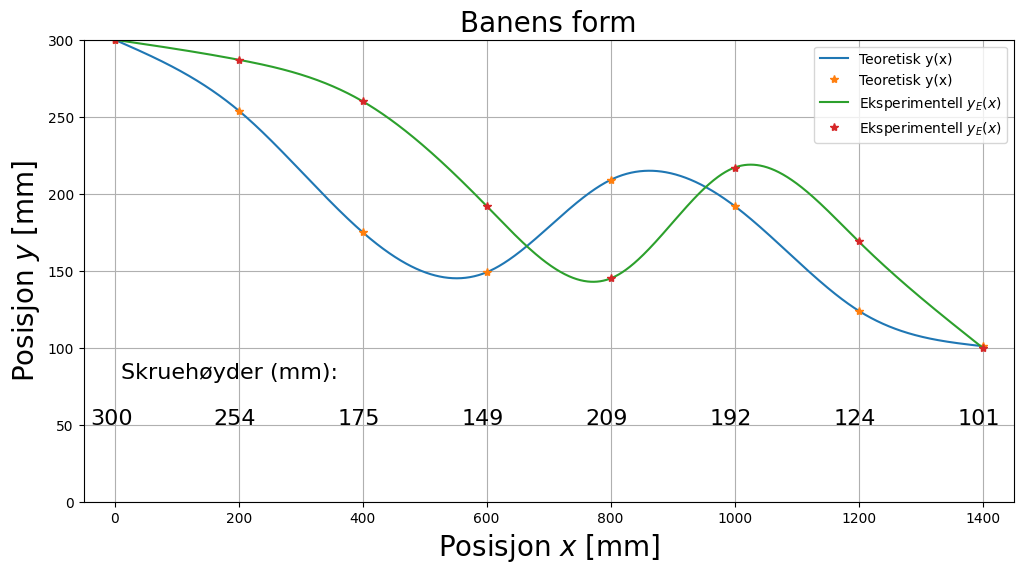

In [10]:
display.Image("images/baneform.png")

<b> Figur 3.</b> Teoretisk baneform sammenlignet med eksperimentall baneform.

Målingene av rulletiden er vist i tabell 1. Den teoretiske rulletiden på kula var $1.53 \, \textrm{s}$ og ble kalkulert med metoden forklart i teoridelen. Gjennomsnittsrulletiden for kulen ved de ti forsøkene ble $t_E = (1.307 \pm 0.012) \, \textrm{s}$. Usikkerheten er her standardfeilen.

Tabell 2 viser slutthastighetene ved de ti eksperimentelle forsøkene, sammen med den teoretiske kalkulerte slutthastigheten $v = 1.67 \, \textrm{s}$. Den gjennomsnittlige slutthastigheten med standardfeil blir $v_E = (1.71 \pm 0.02) \, \textrm{m/s}$. Hastigheten $v_E(t)$ for et av de ti forsøkene er plottet med referansehastigheten $v(t)$ i figur 4.

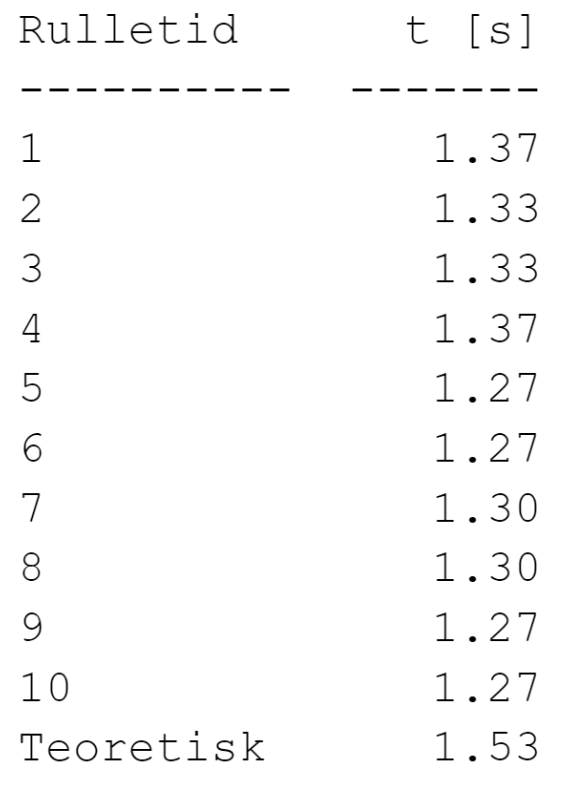

In [21]:
display.Image("images/tabell_rulletid.png")

<b>Tabell 1.</b> Rulletider i ti forsøk, med referanse

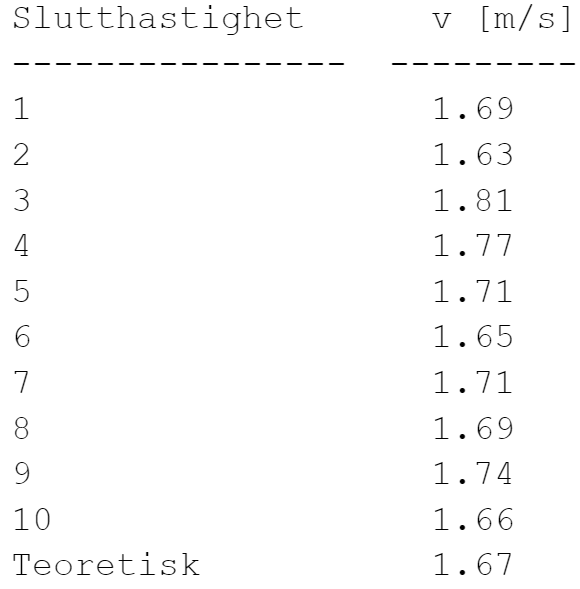

In [12]:
display.Image("images/tabell_hastighet.png")

<b>Tabell 2.</b> Slutthastigheter i ti forsøk, med referanse

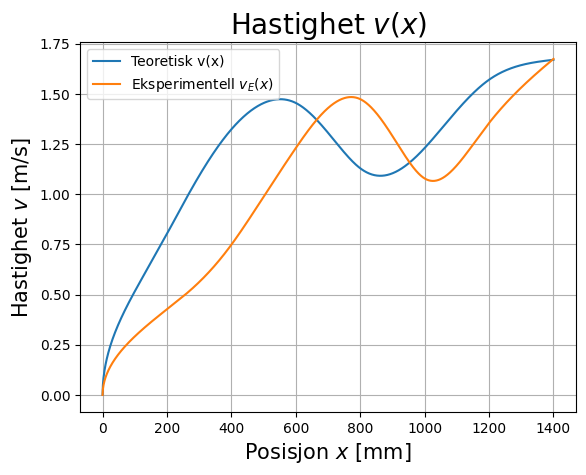

In [20]:
display.Image("images/hastighet.png")

<b>Figur 4.</b> Teoretisk hastighet sammenlignet med eksperimentell hastighet.

Middelverdien med standardfeil for den kinetiske energien i de ti eksperimentelle forsøkene blir kalkulert til $Ekin_E = (0.0452 \pm 0.0009) \, \textrm{J}$. Tabell 3 viser de ti forsøkene med den teoretiske referansen $Ekin = 0.0605 \, \textrm{J}$. Den potensielle energien ved starten av rullebanen er $Epot = 0.0605 \, \textrm{J}$. 

Med middelverdien for den kinetiske energien og den potensielle energien, kalkuleres middelverdien for tap av mekanisk energi til $Etap = (0.0153  \pm 0.0009) \, \textrm{J}$. Verdier for tap av mekanisk energi er vist i tabell 4.


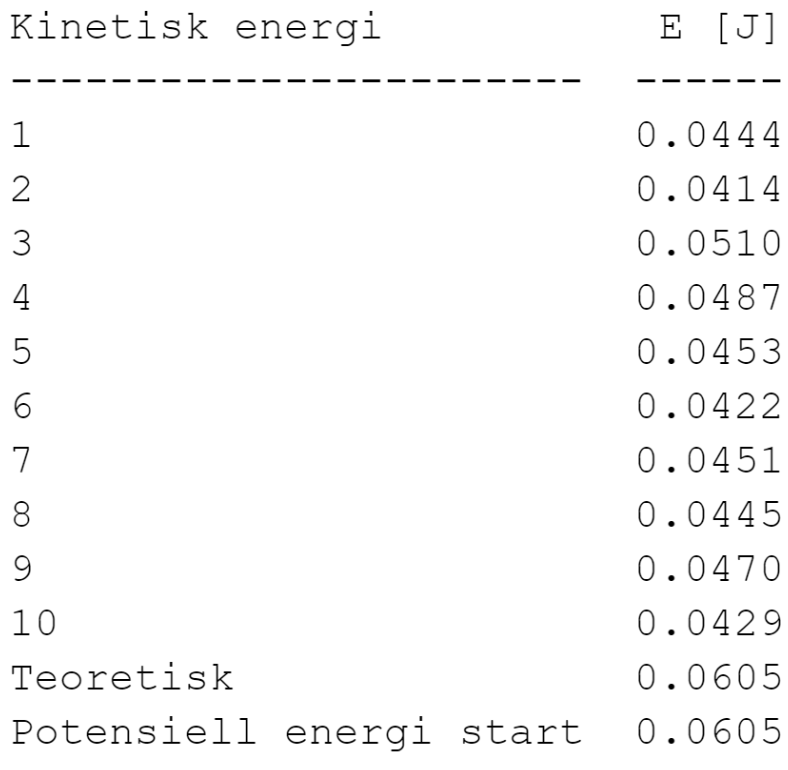

In [23]:
display.Image("images/tabelll_kinetisk_energi.png")

<b>Tabell 3.</b> Kinetisk energi i ti forsøk, med referanse og potensiell energi (start)

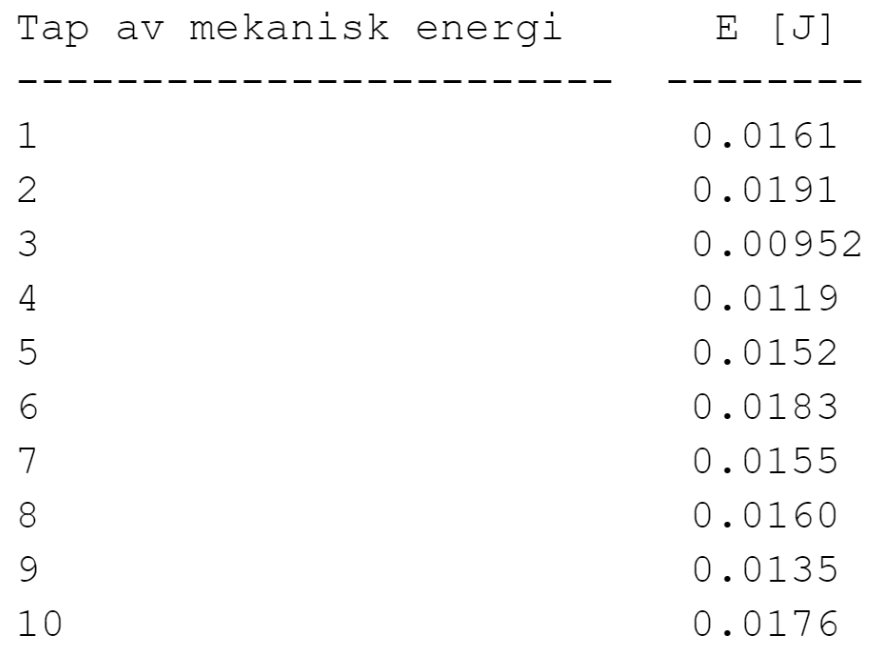

In [24]:
display.Image("images/tabell_tap_mekanisk_energi.png")

<b>Tabell 4.</b> Tap av mekanisk energi i ti forsøk.

Friksjonskraften $f$ gjennom hele banen er vist i figur 5. Normalkraften  $N$ vises i figur 6. Forholdet mellom friksjonskraften og normalkraften med hensyn på posisjonen i x-retning gir friksjonskoeffisienten $μ$, presentert i figur 7.

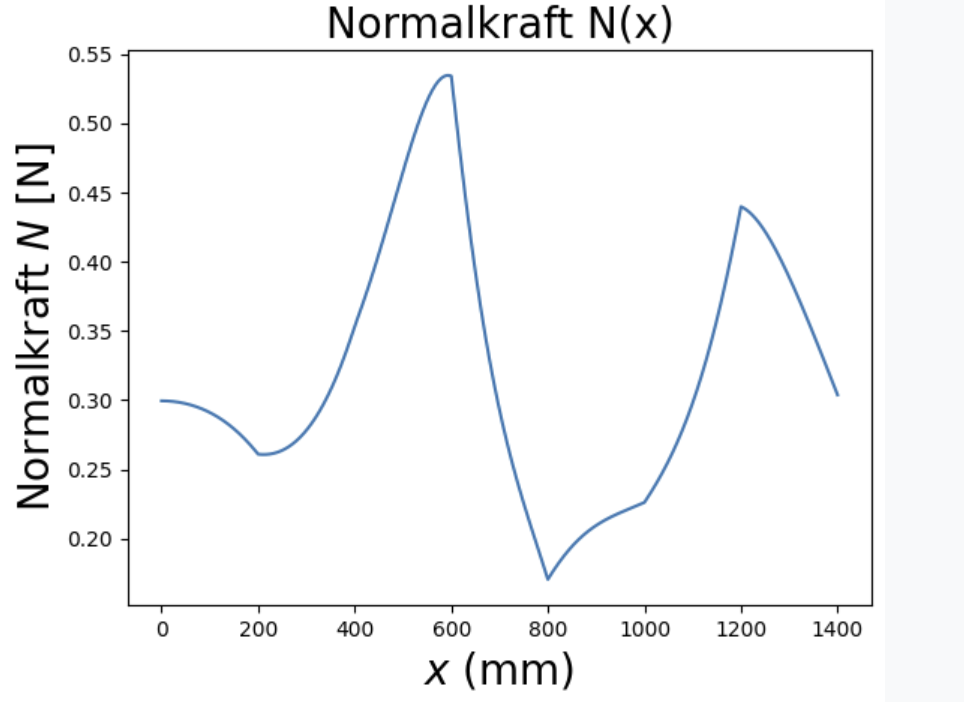

In [16]:
display.Image("images/normalkraft.png")

<b>Figur 5.</b> Beregnet normalkraft $N$ med hensyn på posisjon i x-retning.

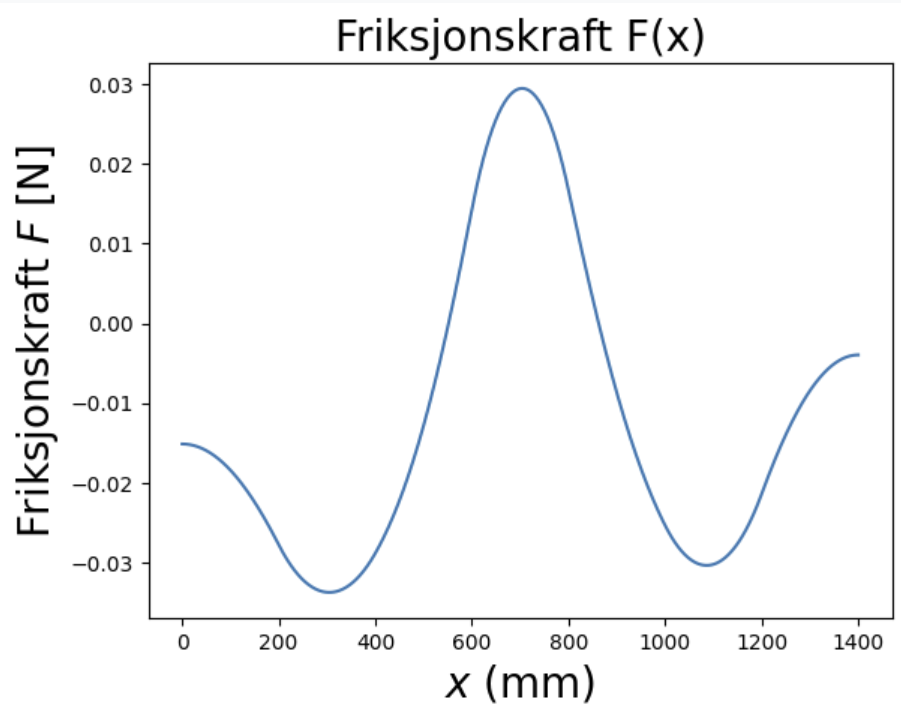

In [17]:
display.Image("images/friksjonskraft.png")

<b>Figur 6.</b> Den beregnede friksjonskraften $F$ plottet med hensyn på posisjon i x-retning.

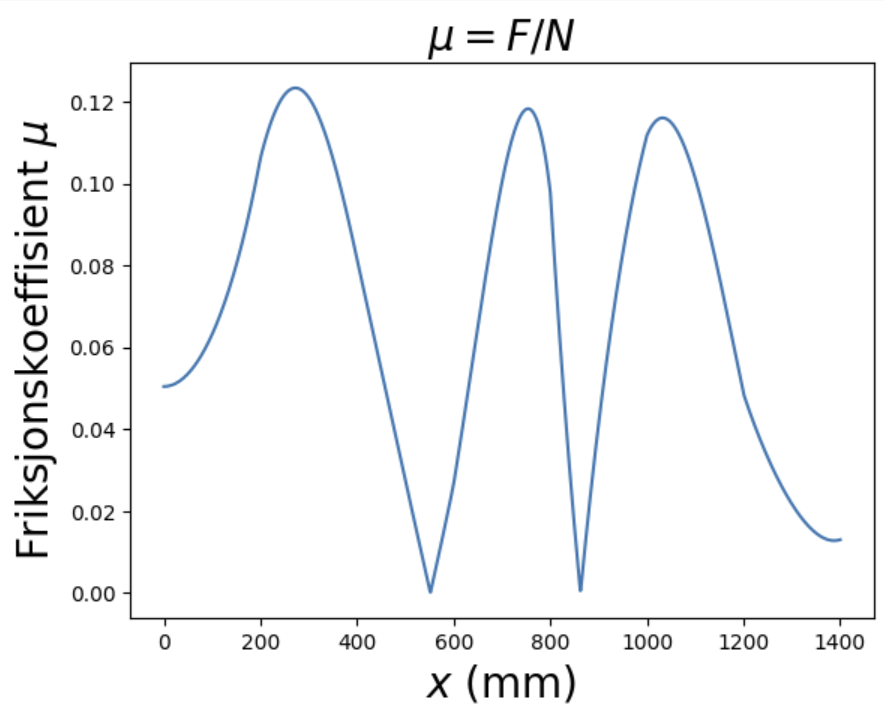

In [19]:
display.Image("images/friksjonskoeffisient.png")

<b>Figur 7.</b> Absoluttverdien av forholdet mellom friksjonskraften $f (x)$ og normalkraften $N(x)$ gir friksjonskoeffisienten $μ$. Figuren representerer den beregnede friksjonskoeffisienten $μ$ med hensyn på posisjonen i x-retning.

## Diskusjon

#### Usikkerhetsanalyse og en diskusjon av resultater fra numerikk og eksperimenter

Den eksperimentelle utformingen av baneformen $y(x)$ vil ha stor innvirkning på kulens hastighet $v(x)$. Ut ifra Figur 3 (baneform) ser vi at det er en vesentlig differanse mellom eksperimentell og teoretisk baneform, dette kan skyldes at forsøkene ble filmet med en dårlig kameravinkel som igjen kan ha ført til at videoanalyseverktøyet “Tracker” [1] ikke klarte å modellere banen riktig. Grafen vist i Figur 3 tyder på at eksperimentell baneform er forskjøvet med ca. $200 \, \textrm{mm}$. Dette medfører at påfølgende graf for eksperimentell hastighet vist i Figur 4 også er forskjøvet i forhold til teoretisk hastighet. 

Baneformen $y(x)$ vil også påvirke størrelsen $N(x)$. Ved $x = 600 \, \textrm{mm}$ ($y(x)$ sitt bunnpunkt) vil kula samtidig være ved $v(x)$ sitt eneste toppunkt. Høy hastighet ved et lavt punkt tilsier at kula krever større sentripetal kraft for å følge baneformens krumning. Dette samsvarer med grafen til $N(x)$, hvor $x=600 \, \textrm{mm}$ tilsvarer et toppunkt, her vil normalkraften være større enn kulas vekt, fordi den balanserer vekten og den nødvendige sentripetalkraften. Det motsatte tilfellet vil være ved toppunktet til $y(x)$, hvor $N(x)$ tilsvarer $-1.3 \, \textrm{N}$, som er mindre enn kulas tyngde. Dette skyldes at kun en del av tyngden virker som normalkraft, mens resten bidrar til den sentripetale banen. 

Fra Figur 7 ser vi hvordan friksjonskoeffisienten $\mu_s$ varierer med posisjonen $x$. Her ser vi at den høyeste beregnede friksjonskoeffisienten $\mu$ er på ca. $0.12$. Den statiske friksjonskoeffisienten $\mu_s$ er anslått til å være $0.4$. Dermed er det rimelig å anta at den beregnede friksjonskraften $F$ ikke overstiger sin maksimale verdi gitt ved $F = \mu_s |N|$ og at antagelsen om ren rulling er oppfylt. 

Som presentert i Tabell 1 er den målte rulletiden til kulen $1.31 \, \textrm{s}$, med en standardfeil på $\pm0.01 \, \textrm{s}$. Den beregnede rulletiden er på $1.48 \, \textrm{s}$. Dette avviket kan skyldes at den teoretiske og den eksperimentelle baneformen ikke samsvarer fullstendig. En annen årsak kan være at kulen sin startfart $v_0 > 0$ eller at det er gjort målefeil. Dersom dette avviket skyldes målefeil er trolig den samme feilen gjort i hvert forsøk siden standardfeilen er såpass liten. Med utgangspunkt i beregnet rulletid kan en konkludere med at den målte rulletiden er rimelig.

Som vist i tabell 4 får vi et et tap av mekanisk energi på $0.0153 \,  \textrm{J}$. Med tanke på at overflaten til kulebanen er svært jevn (ref. friksjonskoeffisienten i figur 7) kan man anta at tapet av kinetisk energi er rimelig. En tilhørende standardfeil på $\pm0.0009 \, \textrm{J}$ tilsier at det er lite spredning i forsøkene. Eventuelle feilkilder knyttet til lave standardfeil kan være systematiske feil, som at kulens startfart $v_0 > 0$. 




<!-- 
Her diskuteres resultatene, både de numeriske og de eksperimentelle. <br>

- Kan forskjellene mellom numerisk og eksperimentell hastighet $v(x)$ forklares med utgangspunkt i
forskjellene mellom numerisk og eksperimentell baneform $y(x)$?
- Er grafene for $v(x)$, $N(x)$ og $f(x)$ rimelige med utgangspunkt i baneformen $y(x)$? 
Vurder spesielt topp-punkt, bunnpunkt(er) og vendepunkter.
- Er det sannsynlig at baneformen gir ren rulling? Dette avhenger av at beregnet friksjonskraft hele veien er mindre enn maksimal statisk friksjonskraft, som er gitt ved $\mu_s N$. Grafen for $|f(x)/N(x)|$ gir grunnlag for å diskutere dette.
- Er målt rulletid rimelig, med utgangspunkt i beregnet rulletid?
- Er målt tap i mekanisk energi rimelig? Diskuter feilkilder. -->

## Konklusjon
Det har blitt gjennomført et forsøk hvor en kule har blitt sluppet gjennom en kulebane. I forkant av forsøket ble det gjennomført teoretiske beregninger for å simulere oppførselen til kula, disse beregningene skulle sammenlignes med eksperimentelle målinger. Den teoretiske rulletiden var $1.53 \, \textrm{s}$, mens den eksperimentelle rulletiden ble målt til $1.31 \, \textrm{s}$. Den teoretiske sluttfarten var $1.67 \, \textrm{m/s}$, mens den eksperimentelle sluttfarten ble målt til $1.71 \, \textrm{m/s}$, med tilhørende standardfeil $0.02 \, \textrm{m/s}$. Tap av kinetisk energi tilsvarte  $0.0153 \, \textrm{J}$ med standardfeil $\pm0.0009 \, \textrm{J}$. 

## Referanser

[1] D. Brown, C. Wolfgang, R. M. Hanson, "Tracker Video Analysis and Modeling Tool", https://physlets.org/tracker/, 2023. <br>
[2] I. Newton, Philosophiæ naturalis principia mathematica, 1687.  <br>
[3] J. A. Støvneng, Ren rulling på krumt underlag - energibevarelse, https://home.phys.ntnu.no/brukdef/undervisning/fyslab/files/labligninger_V23.pdf, 2023.<br>





<!-- En labrapport som denne vil typisk inneholde et *lite* antall referanser. Av den grunn
er det greit å nummerere disse manuelt. Hvis du sjekker ulike
tidsskrifter, vil du se at ulike konvensjoner for formatering av referanser benyttes.
Det viktige er at referanselista formateres systematisk. Nedenfor viser vi eksempler på
henvisning til tidsskriftartikler, bok og url, med formatering
som benyttet i tidsskriftet Physical Review Letters: <br>

[1] D. Xiao, W. Yao, and Q. Niu, Valley-Contrasting Physics in Graphene: Magnetic Moment and Topological Transport, Phys. Rev. Lett. <b>99</b>, 236809 (2007).  <br>

[2] D. Xiao, M.-C. Chang, and Q. Niu, Berry phase effects on electronic properties, 
Rev. Mod. Phys. <b>82</b>, 1959 (2010).  <br>

[3] T. Ihn, <i>Semiconductor Nanostructures: Quantum States and
Electronic Transport</i> (Oxford University Press, New York,
2010). <br>

[4] See Supplemental Materials at
<a href="http://link.aps.org/supplemental/10.1103/PhysRevLett.128.067702">
link.aps.org/supplemental/10.1103/PhysRevLett.128.067702</a>.
<br><br>

Til sammenligning, et par referanser fra en artikkel i Chemical Reviews: <br>

(1) Ayyagari, A. V.; Gwalani, B.; Muskeri, S.; Mukherjee, S.;
Banerjee, R. Surface degradation mechanisms in precipitationhardened high-entropy alloys. *npj Materials Degradation* <b>2018</b>, *2*, 33.  <br>
(2) Frankel, G. S.; Vienna, J. D.; Lian, J.; Scully, J. R.; Gin, S.; Ryan,
J. V.; Wang, J.; Kim, S. H.; Windl, W.; Du, J. A comparative review of
the aqueous corrosion of glasses, crystalline ceramics, and metals. *npj
Materials Degradation* <b>2018</b>, *2*, 15. <br>

Små, men *mange* forskjeller: type parentes i referansenummeret; plassering, parentesbruk og 
font for årstall; plassering av forbokstav i fornavn; *and* eller ikke *and* foran sistnevnte 
av tre eller flere forfattere. Ubetydelige valg i seg selv, men viktig at alt gjøres *systematisk*. -->
